# In this Project We will use CRISP DM Methodology to work with it

# ** Business understanding**

We will create model to predict food from images using computer vision


# ** Data understanding**

We had two diffrent dataset :
 - Two CSV files contain detailed information about the composition of various foods, including their calorie content, fat content, and more.
 - Folder, there are numerous subfolders, each named after a specific food, which in turn contain a substantial number of images depicting that particular food

# ** Process**

In [ ]:
from google.colab import drive
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Move Most similar images from folder images to new_images using images example in target folder


In [ ]:
source_folder = '/content/drive/MyDrive/Project/Food/images/pho'
destination_folder = '/content/drive/MyDrive/Project/Food/new_images/pho'

Don't Run

In [ ]:
os.makedirs(destination_folder, exist_ok=True)

reference_image = cv2.imread(os.path.join(source_folder, os.listdir(source_folder)[0]))

threshold = 750  # Adjust this value as needed that mse not depassed

image_count = 0

for filename in os.listdir(source_folder):
    if image_count >= 50:
        break  # If we had 50 images he will stop

    image_path = os.path.join(source_folder, filename)
    image = cv2.imread(image_path)

    # Resize the current image to match the shape of the reference image
    image = cv2.resize(image, (reference_image.shape[1], reference_image.shape[0]))

    mse = np.mean((reference_image - image) ** 2)

    if mse < threshold:
        destination_path = os.path.join(destination_folder, filename)
        cv2.imwrite(destination_path, image)
        image_count += 1

print(f"Saved {image_count} images in the destination folder.")
#we try this code with all folder and then Verfy with human check

Count number of images

In [ ]:
import os

# Spécifiez le chemin du dossier principal contenant les sous-dossiers d'images
dossier_principal = '/content/drive/MyDrive/Project/Food/new_images'

# Initialisez une variable pour compter le nombre total d'images
nombre_total_images = 0

# Parcourez tous les sous-dossiers
for dossier, sous_dossiers, fichiers in os.walk(dossier_principal):
    for fichier in fichiers:
        # Vérifiez si le fichier est une image par son extension (ajoutez ou modifiez les extensions au besoin)
        if fichier.lower().endswith(('.png', '.jpg')):
            nombre_total_images += 1

# Affichez le nombre total d'images
print("Nombre total d'images :", nombre_total_images)



Nombre total d'images : 3837


**CSV FILES Process**

In [ ]:
# Get CSV dataset on Google Drive
dataset_csv1 = pd.read_csv('/content/drive/MyDrive/Project/csv/nutrition1.csv')
dataset_csv2 = pd.read_csv('/content/drive/MyDrive/Project/csv/nutrition2.csv')

In [ ]:
print( "Shape of the first dataset is : ", dataset_csv1.shape )
#dataset1.info()
dataset_csv1.columns

Shape of the first dataset is :  (8789, 77)


Index(['Unnamed: 0', 'name', 'serving_size', 'calories', 'total_fat',
       'saturated_fat', 'cholesterol', 'sodium', 'choline', 'folate',
       'folic_acid', 'niacin', 'pantothenic_acid', 'riboflavin', 'thiamin',
       'vitamin_a', 'vitamin_a_rae', 'carotene_alpha', 'carotene_beta',
       'cryptoxanthin_beta', 'lutein_zeaxanthin', 'lucopene', 'vitamin_b12',
       'vitamin_b6', 'vitamin_c', 'vitamin_d', 'vitamin_e', 'tocopherol_alpha',
       'vitamin_k', 'calcium', 'copper', 'irom', 'magnesium', 'manganese',
       'phosphorous', 'potassium', 'selenium', 'zink', 'protein', 'alanine',
       'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine',
       'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
       'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
       'tryptophan', 'tyrosine', 'valine', 'carbohydrate', 'fiber', 'sugars',
       'fructose', 'galactose', 'glucose', 'lactose', 'maltose', 'sucrose',
       'fat', 'saturated_fatt

In [ ]:
print( "Shape of the second dataset is : ", dataset_csv2.shape )
#dataset2.info()
dataset_csv2.columns

Shape of the second dataset is :  (335, 10)


Index(['Food', 'Measure', 'Grams', 'Calories', 'Protein', 'Fat', 'Sat.Fat',
       'Fiber', 'Carbs', 'Category'],
      dtype='object')

In [ ]:
dataset_csv1.columns = dataset_csv1.columns.str.lower()
dataset_csv2.columns = dataset_csv2.columns.str.lower()

common_columns = list(set(dataset_csv1.columns) & set(dataset_csv2.columns))

# Ensure the common columns have the same data type (e.g., convert to object)
for col in common_columns:
    dataset_csv1[col] = dataset_csv1[col].astype(str)
    dataset_csv2[col] = dataset_csv2[col].astype(str)

# Merge the DataFrames using the common columns
merged_df = pd.concat([dataset_csv1[common_columns], dataset_csv2[common_columns]], ignore_index=True)

# Save the merged DataFrame to a new CSV file if needed
merged_df.to_csv('/content/drive/MyDrive/Project/csv/merged_dataset.csv', index=False)

In [ ]:
common_columns

['fiber', 'fat', 'calories', 'protein']

In [ ]:
dataset_csv = pd.read_csv('/content/drive/MyDrive/Project/csv/merged_dataset.csv')

In [ ]:
print( "Shape of the final dataset is : ", dataset_csv.shape )
dataset_csv.columns

Shape of the final dataset is :  (9124, 4)


Index(['fiber', 'protein', 'fat', 'calories'], dtype='object')

In [ ]:
dataset_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9124 entries, 0 to 9123
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fiber     9124 non-null   object
 1   protein   9124 non-null   object
 2   fat       9124 non-null   object
 3   calories  9123 non-null   object
dtypes: object(4)
memory usage: 285.2+ KB


**Images Process**

In [ ]:
dataset_image_dir = '/content/drive/MyDrive/Project/Food/new_images'
original_images = []  # Original images
new_images = []  # New images
labels = []  # Labels

categories = os.listdir(dataset_image_dir)

In [ ]:
print(categories)
print('Number of Classes',len(categories))

['apple_pie', 'baklava', 'beef_carpaccio', 'beignets', 'bibimbap', 'breakfast_burrito', 'buschetta', 'caesar_salad', 'cannoli', 'carrot_cake', 'cheese_plate', 'cheesecake', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'club_sandwich', 'croque_madame', 'cup_cakes', 'falafel', 'fish_and_chips', 'french_fries', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'grilled_cheese_sandwich', 'grilled_salmon', 'hamburger', 'hummus', 'ice_cream', 'lasagna', 'macaroni_nd_cheese', 'macarons', 'pancakes', 'peking_duck', 'pizza', 'ramen', 'ravioli', 'risotto', 'samosa', 'scallops', 'spaghetti_bolognese', 'spring_rolls', 'steak', 'sushi', 'tacos', 'tiramisu', 'waffles', 'eggs_benedict']
Number of Classes 50


In [ ]:
# Définir le nombre maximum d'images par catégorie
max_images = 40
for category in categories:
    category_path = os.path.join(dataset_image_dir, category)
    # Vérifier si le chemin est un répertoire
    if os.path.isdir(category_path):
        image_count = 0  # Initialiser le compteur d'images pour cette catégorie
        # Parcourir les fichiers de la catégorie
        for filename in os.listdir(category_path):
            if image_count >= max_images:
                break  # Si nous avons atteint le nombre maximum d'images, STOP
            if filename.endswith(".jpg") or filename.endswith(".png"):
                image_path = os.path.join(category_path, filename)
                original_image = cv2.imread(image_path)

                # Resize de l'image à 220*220 pixels
                new_image = cv2.resize(original_image, (220, 220))

                # Ajouter les images à leurs listes respectives
                original_images.append(original_image)
                new_images.append(new_image)

                # Ajouter le label (catégorie) à la liste des labels
                labels.append(category)

                image_count += 1

In [ ]:
print ('Nombre Final des images ',len(new_images))

Nombre Final des images  1950


In [ ]:
df = pd.DataFrame({"Labels": labels})
label_counts = df['Labels'].value_counts()

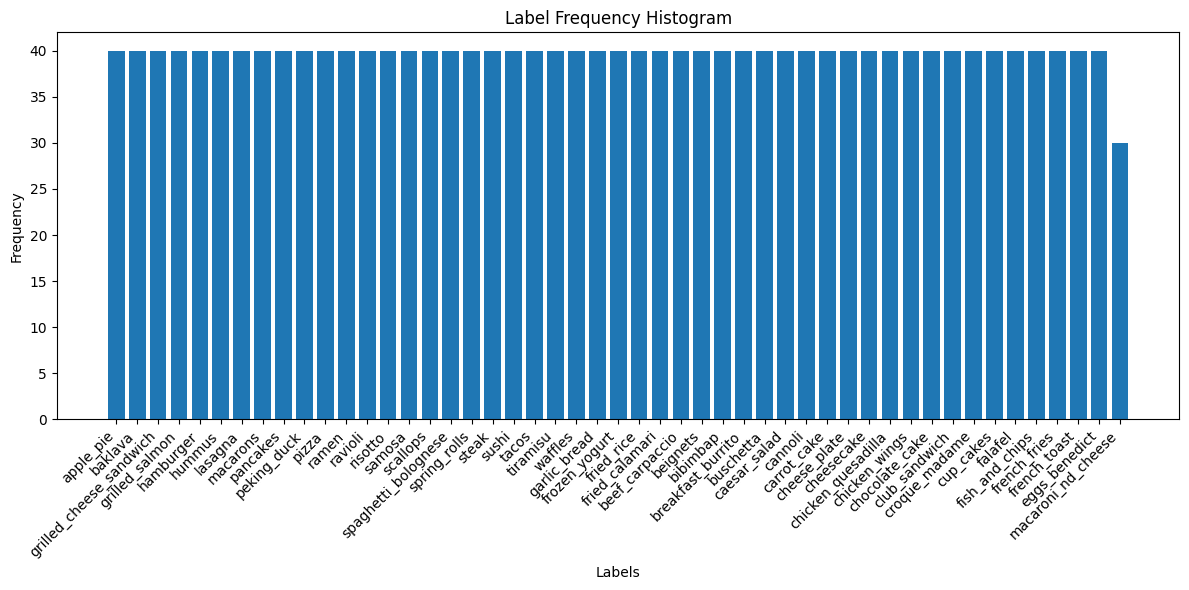

In [ ]:
plt.figure(figsize=(12, 6))

plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Label Frequency Histogram')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Adjust the layout to fit long labels
plt.tight_layout()

# Show the histogram
plt.show()

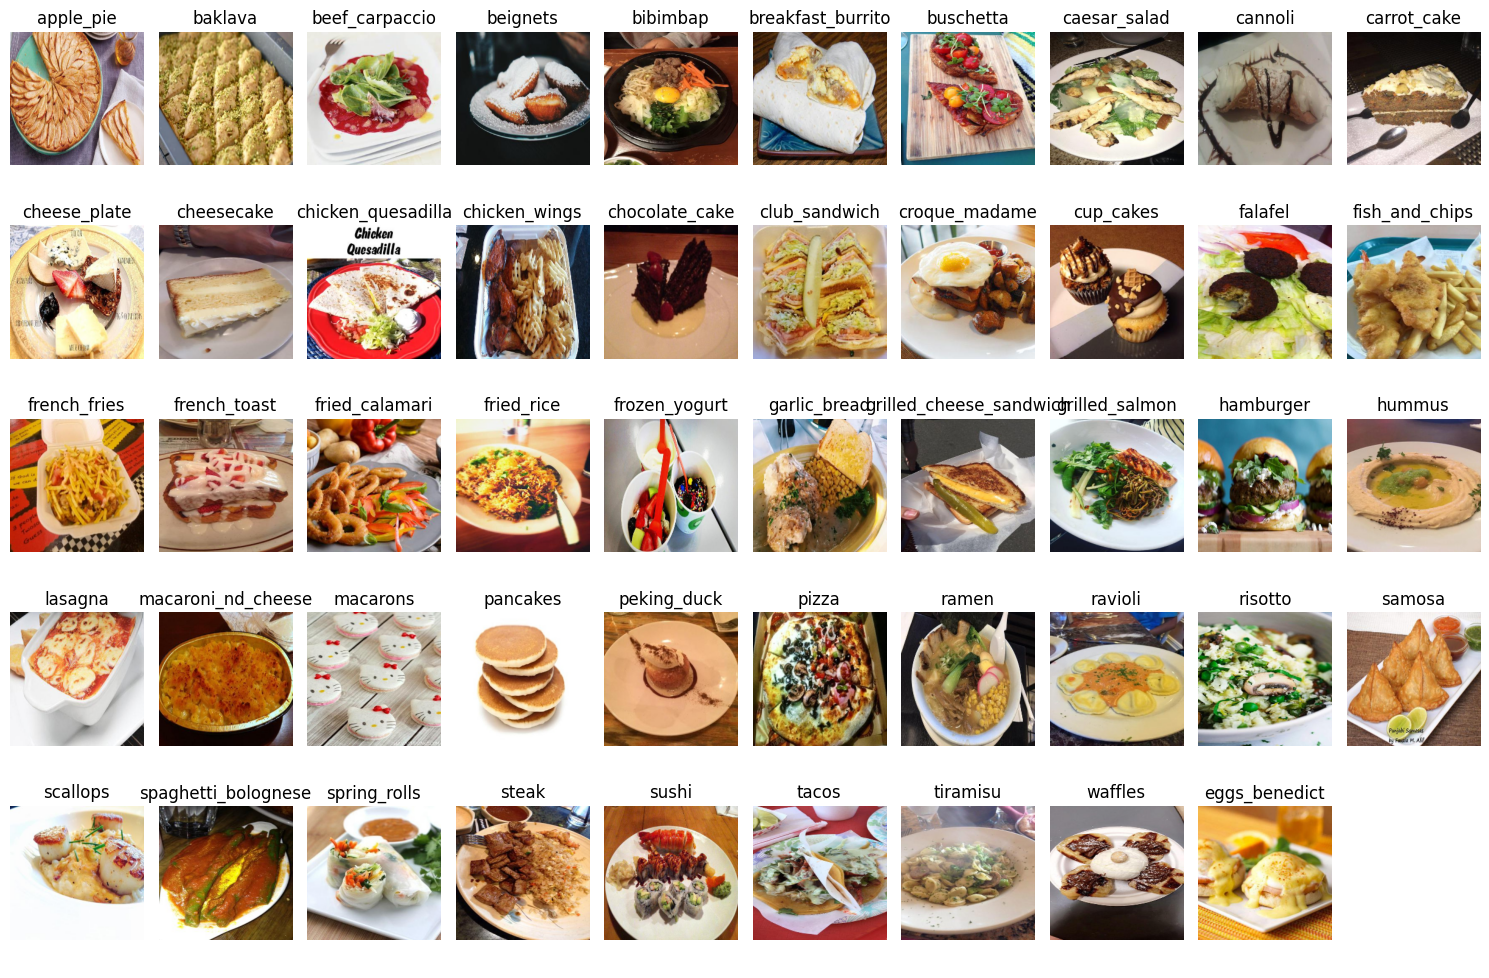

In [ ]:
first_images_per_category = {label: image for label, image in zip(labels, new_images)}

# Determine the grid size based on the number of categories
num_categories = len(first_images_per_category)
num_cols = 10
num_rows = -(-num_categories // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i, (label, image) in enumerate(first_images_per_category.items()):
    ax = axes[i // num_cols, i % num_cols]
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.set_title(label)
    ax.axis('off')

for i in range(num_categories, num_cols * num_rows):
    axes[i // num_cols, i % num_cols].axis('off')

plt.tight_layout()
plt.show()

Now we are well read dataset of images (+ resize to 220 x 220 x 3)
and read csv files

Data Normalization

In [ ]:
new_images = np.array(new_images)

new_images = new_images.astype('float32') / 255.0

print("Shape of normalized data:", new_images.shape)

Shape of normalized data: (1950, 220, 220, 3)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_images, labels, test_size=0.33, random_state=42)

In [ ]:
X_train = np.array(X_train)

In [ ]:
X_test = np.array(X_test)

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels to integers
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert encoded labels to categorical format
y_train_categorical = tf.keras.utils.to_categorical(y_train_encoded, num_classes=50)
y_test_categorical = tf.keras.utils.to_categorical(y_test_encoded, num_classes=50)

# ** Modeling**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ***CNN***

In [ ]:
# Create a CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(220, 220, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(50, activation='softmax')  # 50 is the number of classes
])

In [ ]:
# Compile the model
#cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Display model summary
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 218, 218, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 109, 109, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 51, 51, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 25, 128)       0

In [ ]:
cnn_model.fit(X_train, y_train_categorical, validation_data=(X_test, y_test_categorical), epochs=50)

Epoch 1/50
41/41 [==============================] - 17s 122ms/step - loss: 4.3075 - accuracy: 0.0191 - val_loss: 3.9114 - val_accuracy: 0.0124
Epoch 2/50
41/41 [==============================] - 3s 71ms/step - loss: 3.8829 - accuracy: 0.0413 - val_loss: 3.8940 - val_accuracy: 0.0311
Epoch 3/50
41/41 [==============================] - 3s 69ms/step - loss: 3.7383 - accuracy: 0.0865 - val_loss: 3.8859 - val_accuracy: 0.0357
Epoch 4/50
41/41 [==============================] - 3s 68ms/step - loss: 2.9981 - accuracy: 0.2427 - val_loss: 4.3781 - val_accuracy: 0.0342
Epoch 5/50
41/41 [==============================] - 3s 68ms/step - loss: 1.7035 - accuracy: 0.5674 - val_loss: 5.7371 - val_accuracy: 0.0311
Epoch 6/50
41/41 [==============================] - 3s 72ms/step - loss: 0.7875 - accuracy: 0.8055 - val_loss: 7.6339 - val_accuracy: 0.0435
Epoch 7/50
41/41 [==============================] - 3s 72ms/step - loss: 0.4857 - accuracy: 0.8920 - val_loss: 7.5393 - val_accuracy: 0.0311
Epoch 8/50


In [ ]:
# Train the CNN model
cnn_history = cnn_model.fit(X_train, y_train_categorical, validation_data=(X_test, y_test_categorical), epochs=10)

Epoch 1/10
41/41 [==============================] - 4s 94ms/step - loss: 0.0265 - accuracy: 0.9946 - val_loss: 10.4710 - val_accuracy: 0.0342
Epoch 2/10
41/41 [==============================] - 3s 74ms/step - loss: 0.0087 - accuracy: 0.9977 - val_loss: 10.5677 - val_accuracy: 0.0311
Epoch 3/10
41/41 [==============================] - 3s 76ms/step - loss: 0.0223 - accuracy: 0.9939 - val_loss: 11.4447 - val_accuracy: 0.0466
Epoch 4/10
41/41 [==============================] - 3s 71ms/step - loss: 0.0244 - accuracy: 0.9939 - val_loss: 10.1573 - val_accuracy: 0.0435
Epoch 5/10
41/41 [==============================] - 3s 74ms/step - loss: 0.0230 - accuracy: 0.9946 - val_loss: 10.5447 - val_accuracy: 0.0481
Epoch 6/10
41/41 [==============================] - 3s 74ms/step - loss: 0.0234 - accuracy: 0.9939 - val_loss: 10.3871 - val_accuracy: 0.0559
Epoch 7/10
41/41 [==============================] - 3s 74ms/step - loss: 0.0153 - accuracy: 0.9962 - val_loss: 11.5882 - val_accuracy: 0.0388
Epoch 

Evaluate the CNN model

In [ ]:
# Evaluate the model
cnn_eval = cnn_model.evaluate(X_test, y_test_categorical)
print("CNN Model Evaluation:")
print("Loss:", cnn_eval[0])
print("Accuracy: ", cnn_eval[1] *100)

21/21 [==============================] - 0s 21ms/step - loss: 13.1735 - accuracy: 0.0435
CNN Model Evaluation:
Loss: 13.173493385314941
Accuracy:  4.3478261679410934


# ***Transfert Learning VGG16***

In [ ]:
from tensorflow.keras.applications import VGG16 , VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense , Dropout

In [ ]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(220, 220, 3))

# Add custom layers on top of VGG16
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(50, activation='softmax')(x)

# Create the transfer learning model
transfer_model = Model(inputs=base_model.input, outputs=predictions)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
# Compile the transfer learning model
transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Display model summary
transfer_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 220, 220, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 220, 220, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 220, 220, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 110, 110, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 110, 110, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 110, 110, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 55, 55, 128)       0     

In [ ]:
# Train the transfer learning model
transfer_history = transfer_model.fit(X_train, y_train_categorical, validation_data=(X_test, y_test_categorical), epochs=10)


Epoch 1/10
41/41 [==============================] - 44s 750ms/step - loss: 3.9898 - accuracy: 0.0207 - val_loss: 3.9120 - val_accuracy: 0.0093
Epoch 2/10
41/41 [==============================] - 18s 448ms/step - loss: 3.9092 - accuracy: 0.0153 - val_loss: 3.9134 - val_accuracy: 0.0109
Epoch 3/10
41/41 [==============================] - 18s 443ms/step - loss: 3.9070 - accuracy: 0.0268 - val_loss: 3.9147 - val_accuracy: 0.0109
Epoch 4/10
41/41 [==============================] - 18s 443ms/step - loss: 3.9039 - accuracy: 0.0222 - val_loss: 3.9154 - val_accuracy: 0.0109
Epoch 5/10
41/41 [==============================] - 18s 447ms/step - loss: 3.9009 - accuracy: 0.0199 - val_loss: 3.9173 - val_accuracy: 0.0109
Epoch 6/10
41/41 [==============================] - 18s 446ms/step - loss: 3.8983 - accuracy: 0.0276 - val_loss: 3.9192 - val_accuracy: 0.0109
Epoch 7/10
41/41 [==============================] - 18s 445ms/step - loss: 3.8978 - accuracy: 0.0237 - val_loss: 3.9214 - val_accuracy: 0.0078

In [ ]:
# Evaluate the model
transfer_eval = transfer_model.evaluate(X_test, y_test_categorical)
print("Transfer Learning Model Evaluation:")
print("Loss:", transfer_eval[0])
print("Accuracy:", transfer_eval[1] *100 )

21/21 [==============================] - 3s 119ms/step - loss: 3.9277 - accuracy: 0.0078
Transfer Learning Model Evaluation:
Loss: 3.927703619003296
Accuracy: 0.776397529989481


# Transfert learning MobileNetV2

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Create the base model with pre-trained weights (MobileNetV2 in this case)
base_model = MobileNetV2(input_shape=(220, 220, 3), include_top=False, weights='imagenet')

# Freeze the layers of the base model
base_model.trainable = False

# Create the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(50, activation='softmax')  # Assuming 50 classes, adjust as needed
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:

# Define a data generator for training and validation
batch_size = 32  # Adjust as needed
target_size = (220, 220)  # Adjust as needed

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Use the same directory for both training and validation
train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Project/Food/new_images',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Validation generator
val_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Project/Food/new_images',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)



Found 3086 images belonging to 50 classes.
Found 751 images belonging to 50 classes.


In [ ]:

# Train the model
epochs = 10  # Adjust as needed
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)


Epoch 1/10
96/96 [==============================] - 579s 6s/step - loss: 3.4560 - accuracy: 0.1559 - val_loss: 2.6265 - val_accuracy: 0.3668
Epoch 2/10
96/96 [==============================] - 14s 143ms/step - loss: 2.4317 - accuracy: 0.3625 - val_loss: 2.1821 - val_accuracy: 0.4402
Epoch 3/10
96/96 [==============================] - 14s 145ms/step - loss: 1.9409 - accuracy: 0.4653 - val_loss: 1.9776 - val_accuracy: 0.4701
Epoch 4/10
96/96 [==============================] - 14s 144ms/step - loss: 1.6652 - accuracy: 0.5478 - val_loss: 1.8787 - val_accuracy: 0.4918
Epoch 5/10
96/96 [==============================] - 16s 166ms/step - loss: 1.4505 - accuracy: 0.5956 - val_loss: 1.7822 - val_accuracy: 0.5177
Epoch 6/10
96/96 [==============================] - 14s 145ms/step - loss: 1.2789 - accuracy: 0.6346 - val_loss: 1.7788 - val_accuracy: 0.5245
Epoch 7/10
96/96 [==============================] - 15s 151ms/step - loss: 1.1446 - accuracy: 0.6775 - val_loss: 1.7547 - val_accuracy: 0.5149
E

In [ ]:

# Evaluate the model
eval_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Project/Food/new_images',
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset=None  # Evaluate on the entire dataset
)

eval_result = model.evaluate(eval_generator, steps=eval_generator.samples // batch_size)

# Print the evaluation results
print("Evaluation Loss:", eval_result[0])
print("Evaluation Accuracy:", eval_result[1])

Found 3837 images belonging to 50 classes.
119/119 [==============================] - 14s 115ms/step - loss: 0.6274 - accuracy: 0.8648
Evaluation Loss: 0.6273537874221802
Evaluation Accuracy: 0.8647584319114685


# **YOLO**


In [ ]:
# Step 1: Install dependencies
!pip install opencv-python-headless
!pip install numpy

# Step 2: Download YOLO model weights and configuration files
!wget https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true -O yolov3.cfg
!wget https://pjreddie.com/media/files/yolov3.weights



--2023-12-06 22:24:47--  https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg [following]
--2023-12-06 22:24:47--  https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg [following]
--2023-12-06 22:24:47--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


In [ ]:
import cv2
import os
import numpy as np

# Load YOLO model and weights
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

# COCO class labels directly from the model
classes = ['apple_pie', 'baklava', 'beef_carpaccio', 'beignets', 'bibimbap', 'breakfast_burrito', 'buschetta', 'caesar_salad', 'cannoli', 'carrot_cake', 'cheese_plate', 'cheesecake', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'club_sandwich', 'croque_madame', 'cup_cakes', 'falafel', 'fish_and_chips', 'french_fries', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'grilled_cheese_sandwich', 'grilled_salmon', 'hamburger', 'hummus', 'ice_cream', 'lasagna', 'macaroni_nd_cheese', 'macarons', 'pancakes', 'peking_duck', 'pizza', 'ramen', 'ravioli', 'risotto', 'samosa', 'scallops', 'spaghetti_bolognese', 'spring_rolls', 'steak', 'sushi', 'tacos', 'tiramisu', 'waffles', 'eggs_benedict']

# Path to the folder containing images
folder_path = '/content/drive/MyDrive/Project/Food/new_images/'

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        # Construct the full path to the image file
        image_path = os.path.join(folder_path, filename)

        # Load the image for inference
        image = cv2.imread(image_path)

# Create a blob from the image
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)


In [ ]:

        # Get output layer names
        layer_names = net.getUnconnectedOutLayersNames()

        # Run forward pass to get output from YOLO model
        outputs = net.forward(layer_names)

        # Post-process the outputs
        for output in outputs:
            for detection in output:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]

                if confidence > 0.5:
                    center_x = int(detection[0] * image.shape[1])
                    center_y = int(detection[1] * image.shape[0])
                    w = int(detection[2] * image.shape[1])
                    h = int(detection[3] * image.shape[0])

                    x = int(center_x - w / 2)
                    y = int(center_y - h / 2)

                    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                    label = f"{classes[class_id]}: {confidence:.2f}"
                    cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

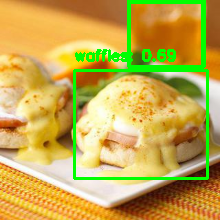

In [ ]:
from google.colab.patches import cv2_imshow

# Display the result
cv2_imshow(image)

# ** Deployement**

In [ ]:
import pickle

pickle.dump(model  , open("model1.pkl","wb"))

In [ ]:
import cv2

# Assuming you have a YOLO model named 'net' loaded in Colab using OpenCV

# Save the YOLO model to a file
net.save("yolo_model.weights")

# Load the YOLO model from a file
loaded_net = cv2.dnn.readNet("yolo_model.weights")

AttributeError: ignored

In [ ]:
tensorflow --v

